### Desafio Python
##### El objetivo es evaluar los datos, realizando un análisis descriptivo y evaluar una serie de modelos de clasificación y elegir el que mejor  resultados obtiene prediciendo la columna 21 que representa si se suscribe al servicio correspondiente.

In [1]:
#Librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Ajuste y carga df
df_bank_add = pd.read_csv('bank-additional-full.csv', delimiter=';', encoding = 'UTF-8') 
df_bank_add.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df_bank_add.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

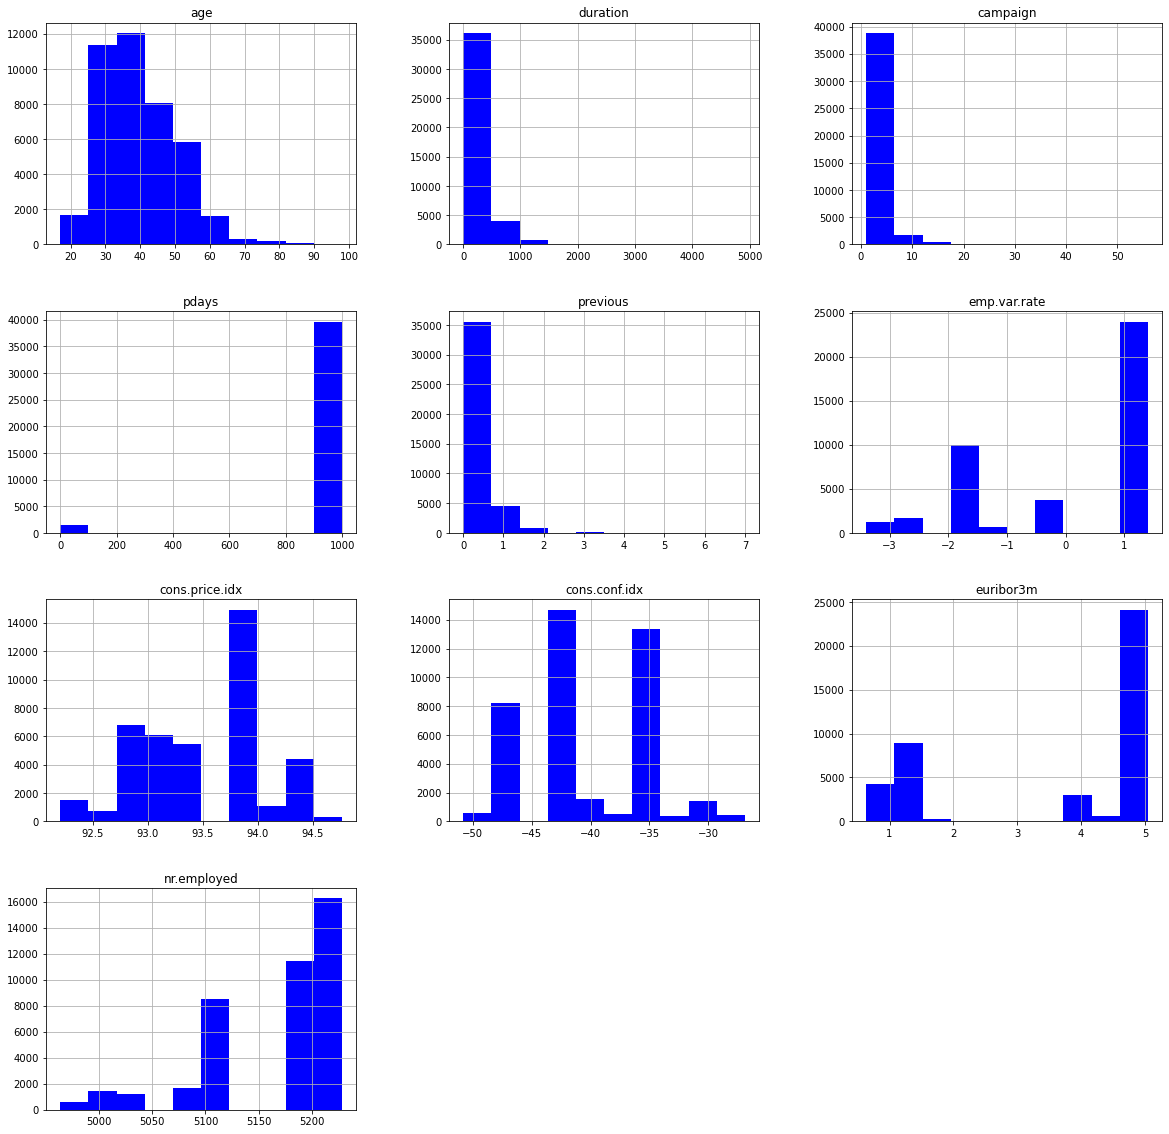

In [5]:
df_bank_add.hist(color='blue', figsize=(20,20))
#Ver duration, campaign, pdays
#Tener en cuenta las variables categoricas para aplicar tecnica para ellas.
#Histograma para ver frecuencia

In [6]:
print(df_bank_add['age'].value_counts())

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


In [7]:
print(df_bank_add['job'].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


In [8]:
print(df_bank_add['education'].value_counts())

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [9]:
print(df_bank_add['marital'].value_counts())

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


In [10]:
print(df_bank_add['y'].value_counts())
#Esta variable se encuentra desbalanceada.

no     36548
yes     4640
Name: y, dtype: int64


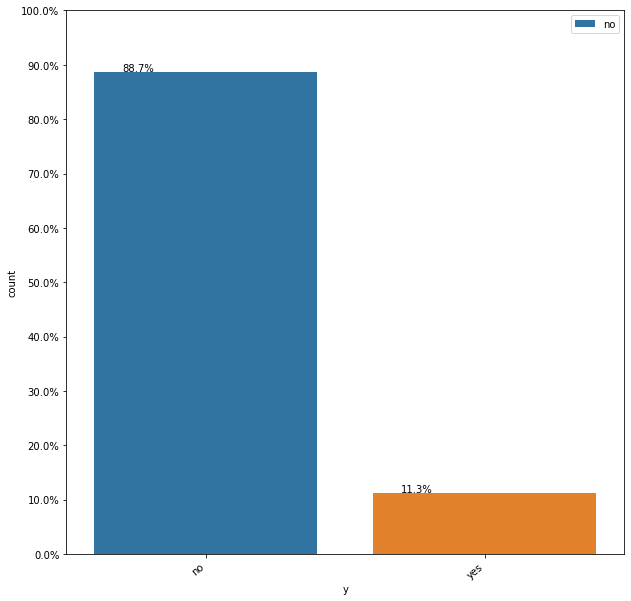

In [11]:
plt.figure(figsize=(10,10))
choice_plot = df_bank_add['y']
total = len(choice_plot)*1.
ax=sns.countplot(x='y', data=df_bank_add)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    ax.legend(labels=['no','yes'])
plt.show()

In [12]:
#Se elabora función para visualizar variblaes de forma individual y comparativa 'Y' que seria si contrata el servicio ofrecido.
def countplot(label, dataset):
    plt.figure(figsize=(15,10))
    choice_plot = df_bank_add[label]
    total = len(choice_plot)*1.
    ax=sns.countplot(x=label, data=dataset)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

In [13]:
%matplotlib inline
def countplot_with_column_y(label, dataset):
    plt.figure(figsize=(15,10))
    choice_plot = df_bank_add[label]
    total = len(choice_plot)*1.
    ax=sns.countplot(x=label, data=dataset, hue='y')
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

### Visualizando variables

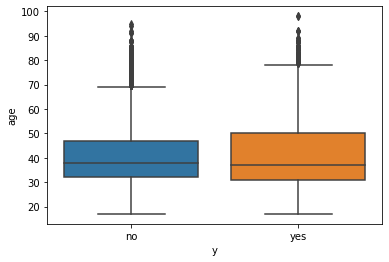

In [14]:
%matplotlib inline
sns.boxplot(data=df_bank_add, x='y', y='age')
plt.show()

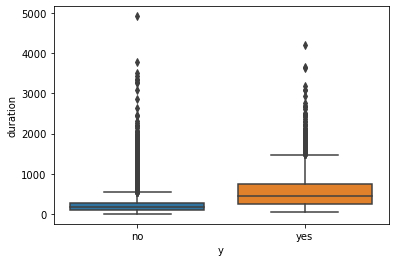

In [15]:

%matplotlib inline
sns.boxplot(data=df_bank_add, x='y', y='duration')
plt.show()

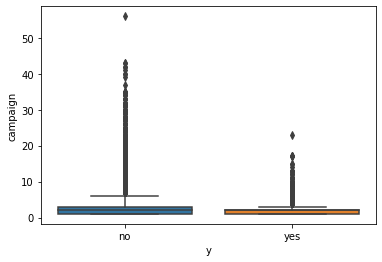

In [16]:
%matplotlib inline
sns.boxplot(data=df_bank_add, x='y', y='campaign')
plt.show()

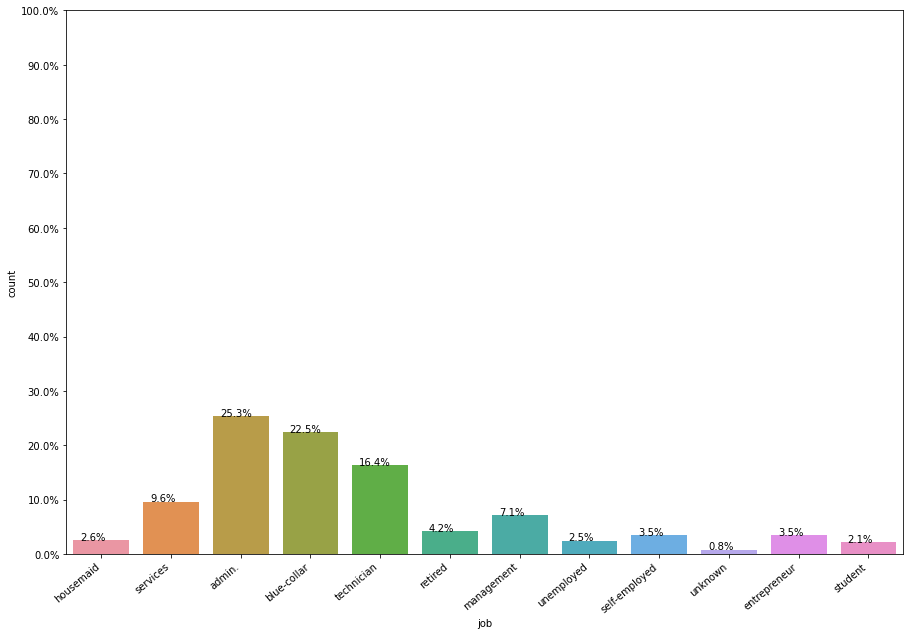

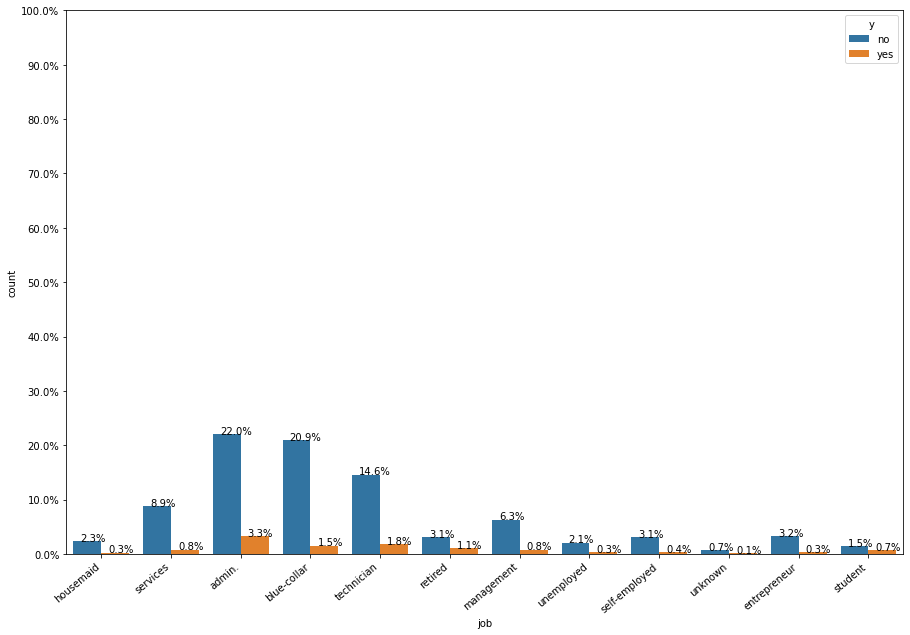

In [17]:
countplot('job', df_bank_add)
countplot_with_column_y('job', df_bank_add)

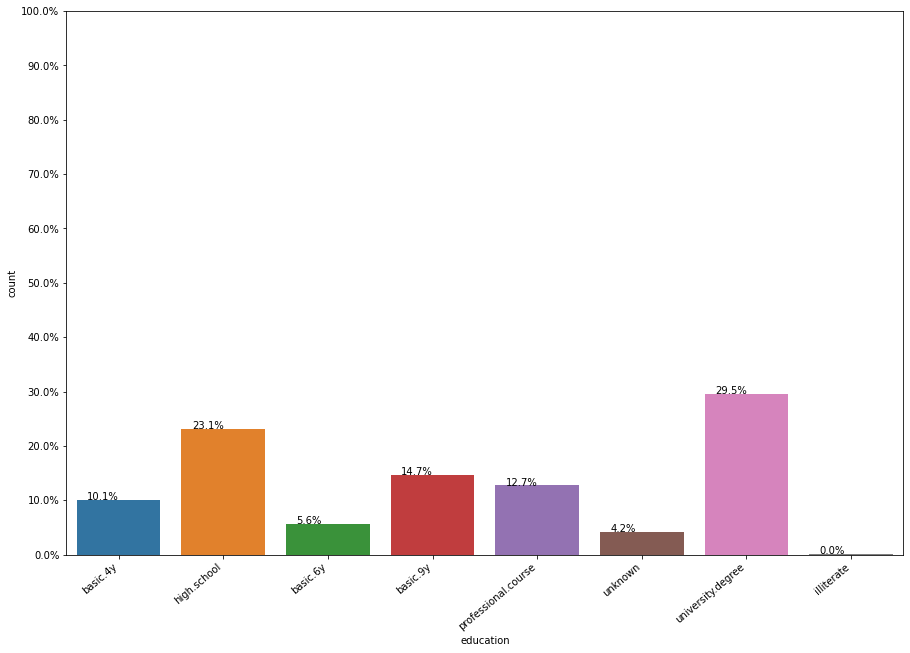

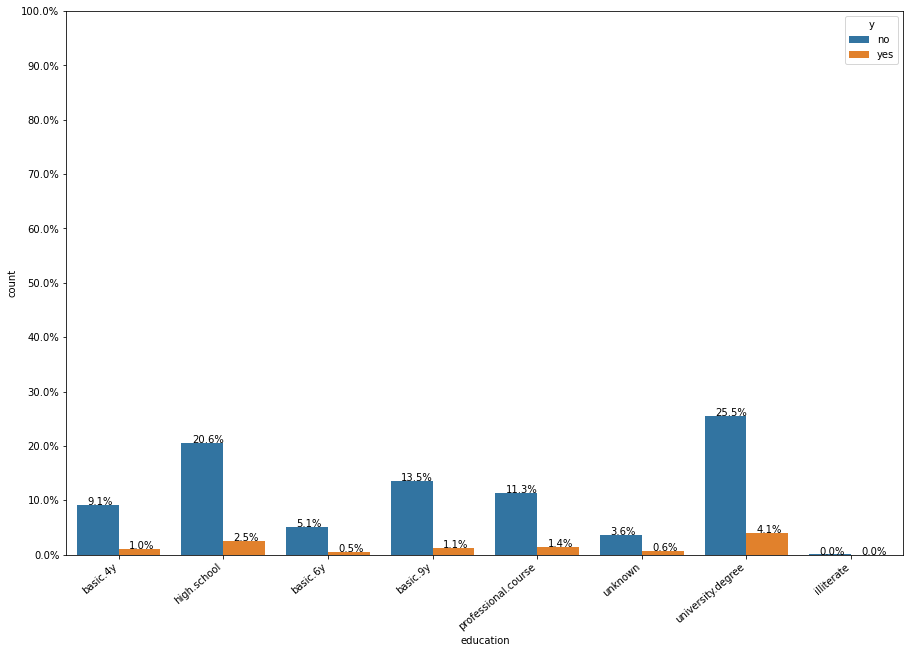

In [18]:
countplot('education', df_bank_add)
countplot_with_column_y('education', df_bank_add)

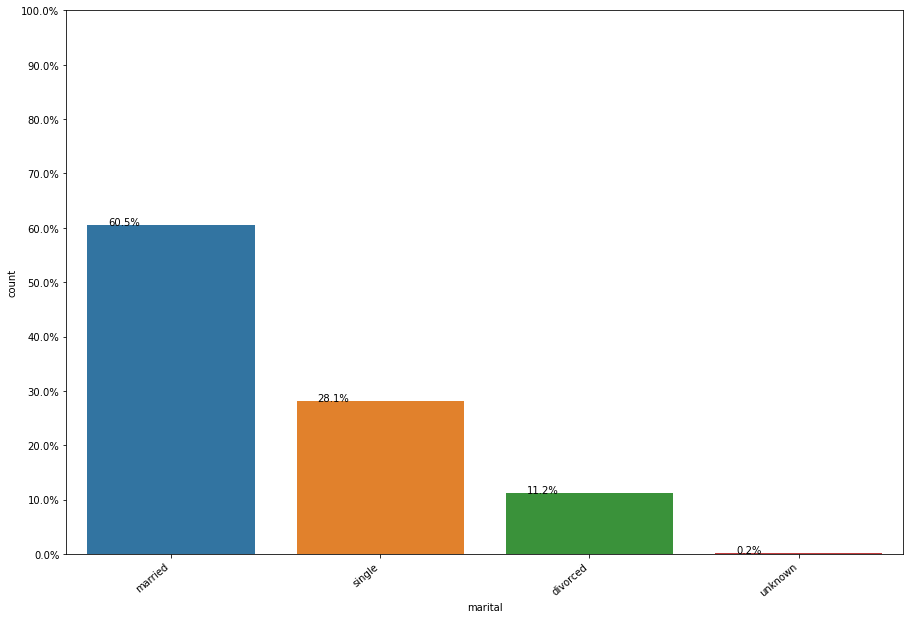

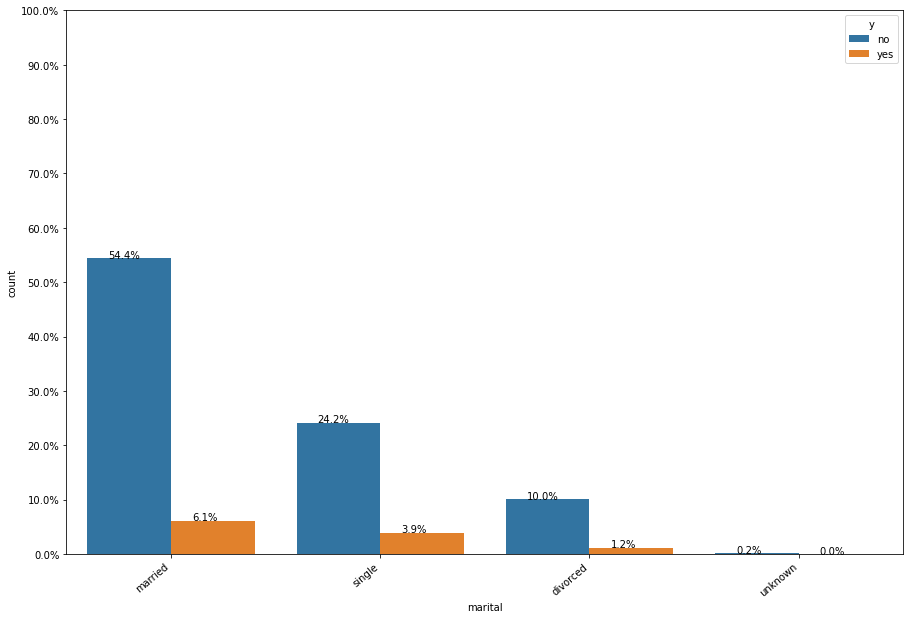

In [19]:
countplot('marital', df_bank_add)
countplot_with_column_y('marital', df_bank_add)

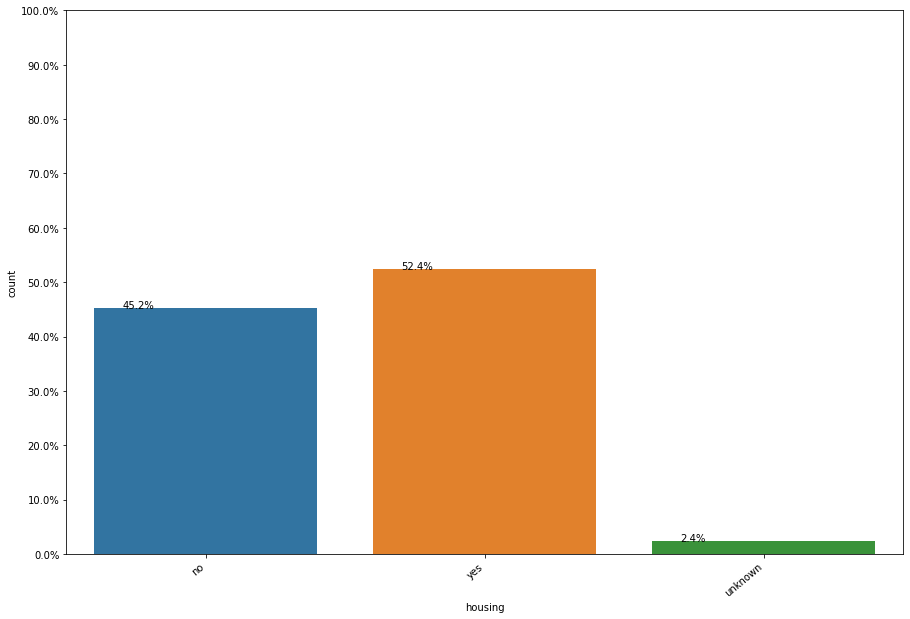

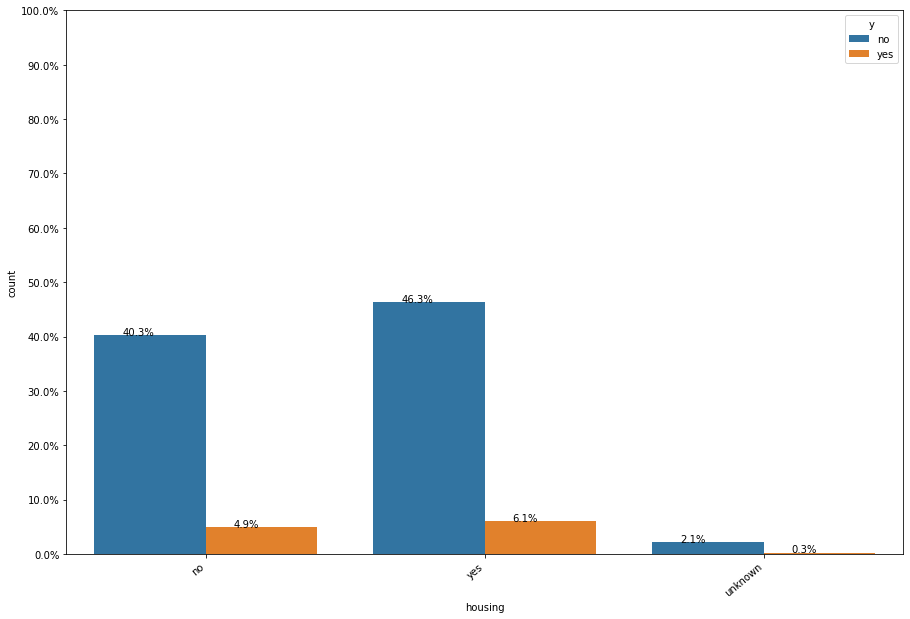

In [20]:
countplot('housing', df_bank_add)
countplot_with_column_y('housing', df_bank_add)

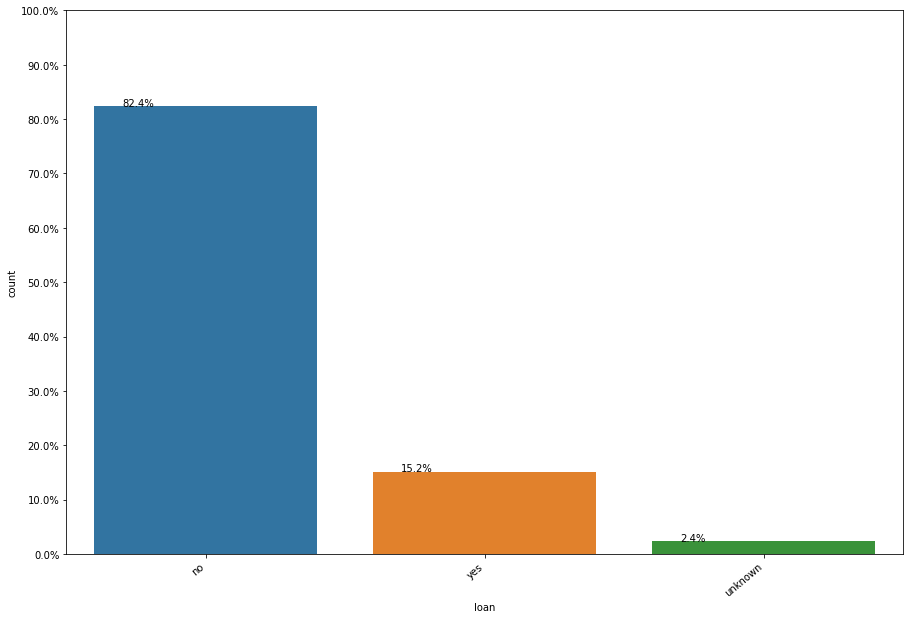

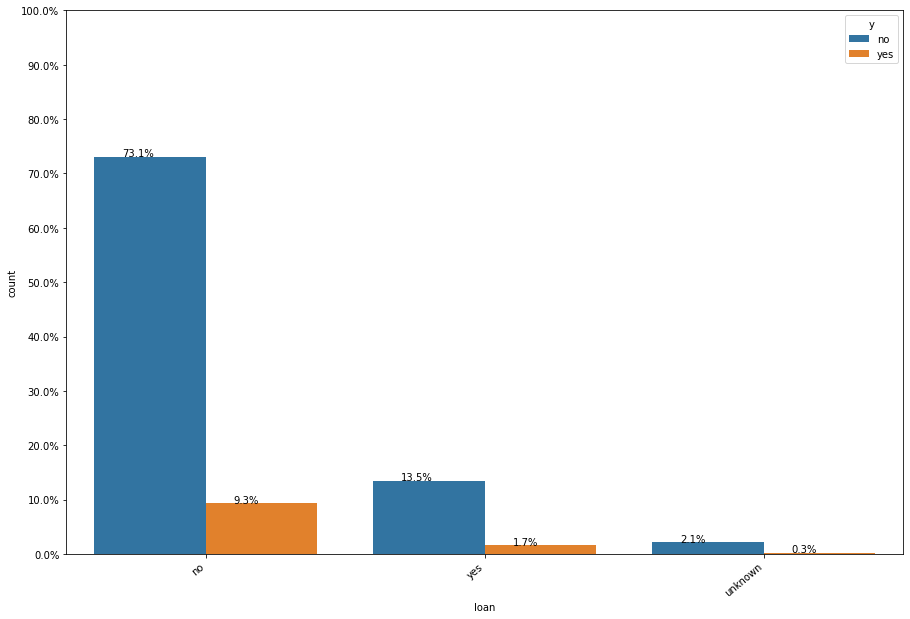

In [21]:
countplot('loan', df_bank_add)
countplot_with_column_y('loan', df_bank_add)

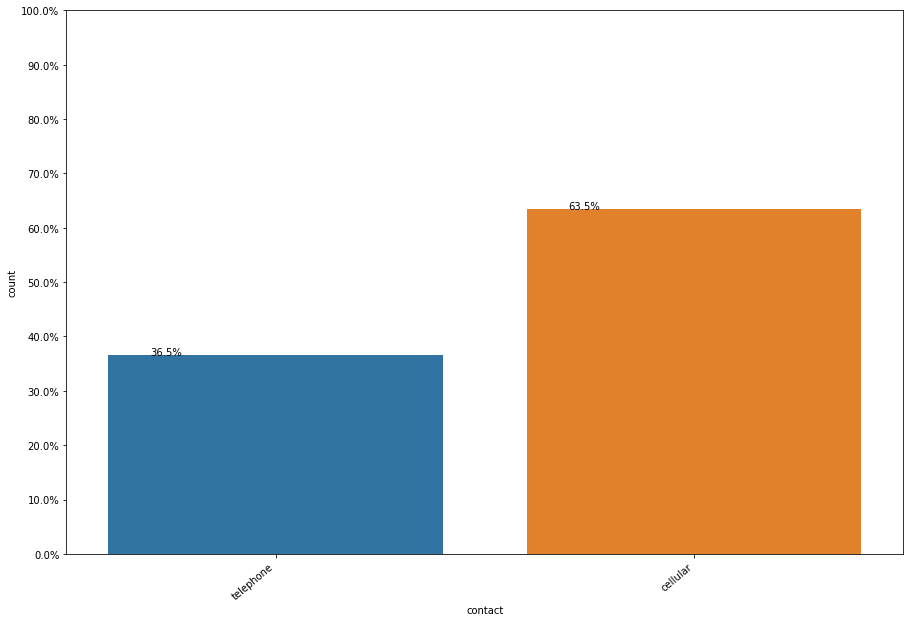

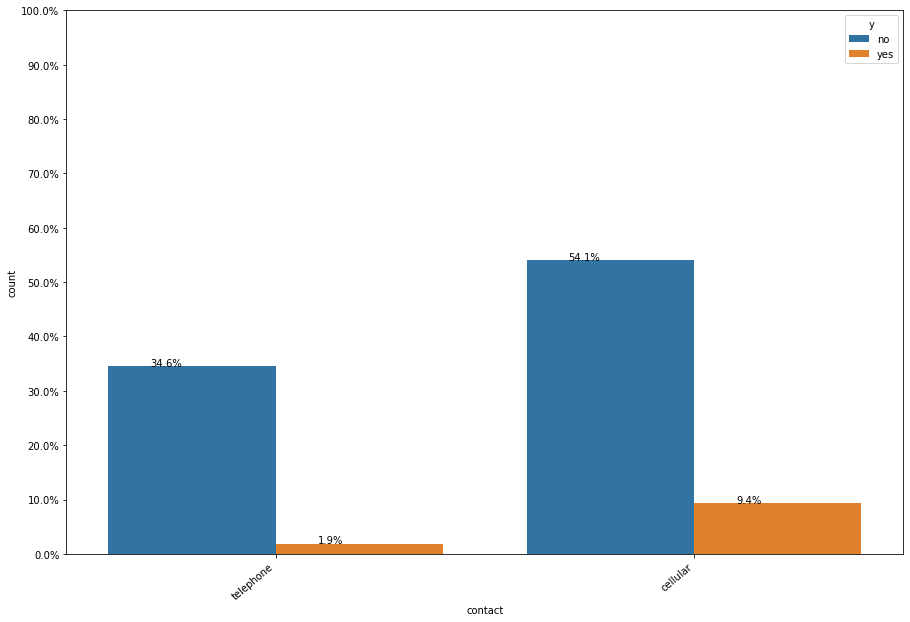

In [22]:
countplot('contact', df_bank_add)
countplot_with_column_y('contact', df_bank_add)

In [23]:
#dias post primer contacto (el valor 999 hace referencia a que no fueron contactados)
df_bank_add['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [24]:
#Cantidad de contactos previos positivos
df_bank_add[df_bank_add['y']=='yes']['previous'].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous, dtype: int64

In [25]:
#Cantidad de contactos previos negativos
df_bank_add[df_bank_add['y']=='no']['previous'].value_counts()

0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous, dtype: int64

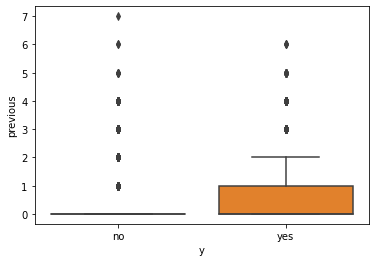

In [26]:
#Contacto previo comparado con cantidad de contrataciones 'y'
%matplotlib inline
sns.boxplot(data=df_bank_add, x='y', y='previous')
plt.show()

### Visualizando variables sociales

In [27]:
df_bank_add['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

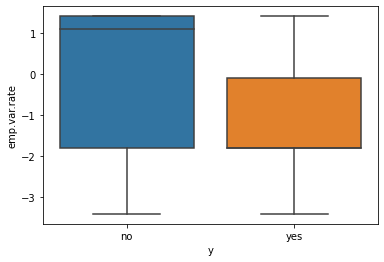

In [28]:
%matplotlib inline
sns.boxplot(data=df_bank_add, x='y', y='emp.var.rate')
plt.show()

In [29]:
df_bank_add['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

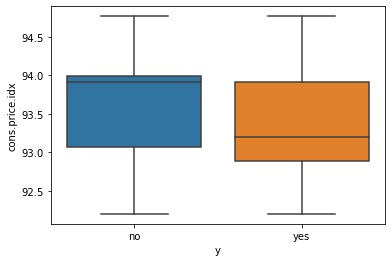

In [30]:
%matplotlib inline
sns.boxplot(data=df_bank_add, x='y', y='cons.price.idx')
plt.show()

In [31]:
df_bank_add['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

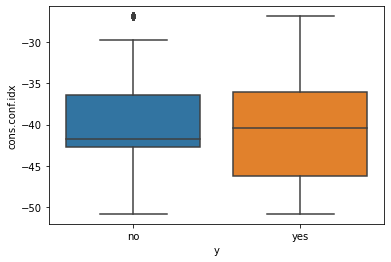

In [32]:
%matplotlib inline
sns.boxplot(data=df_bank_add, x='y', y='cons.conf.idx')
plt.show()

In [33]:
df_bank_add['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

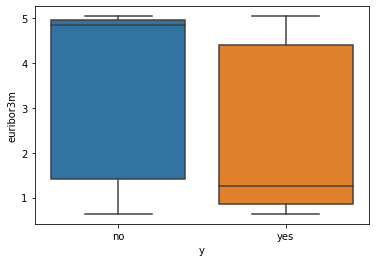

In [34]:
%matplotlib inline
sns.boxplot(data=df_bank_add, x='y', y='euribor3m')
plt.show()

In [35]:
df_bank_add['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

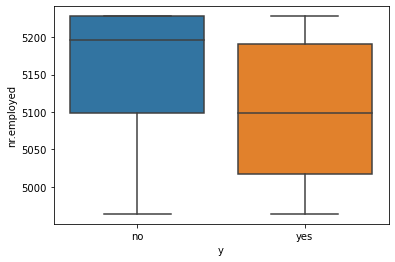

In [36]:
%matplotlib inline
sns.boxplot(data=df_bank_add, x='y', y='nr.employed')
plt.show()

### Visualizando correlaciones 

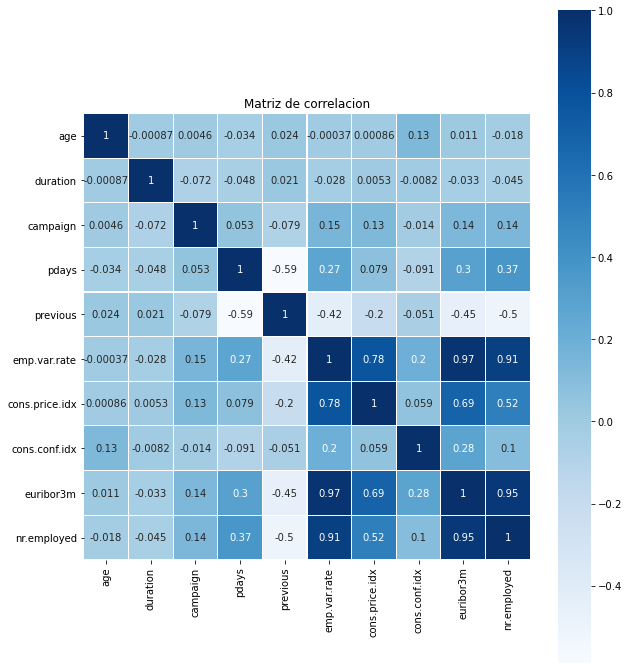

In [37]:
#Con esta tecnica se puede mirar a simple vista los número que denota la fuerza de la relación entre dos variables.
%matplotlib inline
correlation_mat = df_bank_add.corr()
ax = plt.subplots(figsize=(10,12))
sns.heatmap(correlation_mat, annot = True, linewidths=0.1, square=True, cmap='Blues')
plt.title('Matriz de correlacion')
plt.show()

### Reingeniería

In [38]:
data =  pd.read_csv('bank-additional-full.csv', delimiter=';', encoding = 'UTF-8')
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [39]:
#Mirar si hay datos faltantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [40]:
#mirar si hay datos duplicados
data_double = data[data.duplicated(keep='last')]
data_double

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [41]:
#Se eliminan las 12 filas duplicadas
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [42]:
#Se prepara el data set para Train, Test y split
#Separar variable target
data_x = data.iloc[:, :-1]
print('Shape - X:', data_x.shape)
data_y = data['y']
print('Shape - Y:', data_y.shape)

Shape - X: (41176, 20)
Shape - Y: (41176,)


In [43]:
#Se dividira en test 20% 
X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print('X Train:', X_train.shape)
print('X CV:', X_cv.shape)
print('X Test:', X_test.shape)
print('Y Train:', y_train.shape)
print('Y CV:', y_cv.shape)
print('Y Test:', y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [44]:
'''duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
'''
#Se elimina 'duration' del set de datos.
X_train = X_train.drop('duration', axis=1)
print('Dimension of X_train is: ', X_train.shape)
X_cv = X_cv.drop('duration', axis=1)
print('Dimension of CV is: ', X_cv.shape)
X_test = X_test.drop('duration', axis=1)
print('Dimension of X_test is: ', X_test.shape)

Dimension of X_train is:  (26352, 19)
Dimension of CV is:  (6588, 19)
Dimension of X_test is:  (8236, 19)


In [45]:
X_train.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3392,41,blue-collar,married,basic.4y,no,no,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
11722,30,blue-collar,married,basic.9y,no,yes,no,telephone,jun,fri,14,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1


In [46]:
X_cv.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5836,28,admin.,single,university.degree,no,yes,no,telephone,may,mon,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
33901,29,admin.,married,university.degree,no,no,no,cellular,may,wed,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1


In [47]:
X_test.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
15231,50,blue-collar,married,unknown,unknown,no,no,cellular,jul,thu,2,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1
11043,49,technician,married,professional.course,unknown,yes,no,telephone,jun,wed,13,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1


In [48]:
#se reemplazan los yes & no por booleanos(0,1) 
y_train.replace({'no':0, 'yes':1}, inplace=True)
y_cv.replace({'no':0, 'yes':1}, inplace=True)
y_test.replace({'no':0, 'yes':1}, inplace=True)

In [49]:
#Se crea una mascara booleana para cada categoria
categorical_mask = data_x.dtypes==object
categorical_col = data_x.columns[categorical_mask].tolist()
categorical_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

NameError: name 'OneHotEncoder' is not defined

### Metodo one hot DF
###### https://gist.github.com/Nipun-1997/d120082a195098c3f360fa8ec96eff24#file-one_hot_encoding-py


In [51]:
#RECORDAR Esta funcion permite aplicar el metodo one hot encode en el df.
#Transformara cada valor categoria en un input, va a interar en cada columna y codificar cada una de ellas usando el metodo previamente mencionado.
from sklearn.feature_extraction.text import CountVectorizer
def onehot_dataframe(sparse, df, vectorizer, name):

    for i, col in enumerate(vectorizer.get_feature_names()):
      colname = name+'_'+col
      df[colname] = sparse[:, i].toarray().ravel().tolist()
  
    return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  
  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern='[A-Za-z0-9-.]+')
    print('Se codifico: ', i)
    # Codificando train 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = onehot_dataframe(temp_cols, X_train, Vectorizer, i)

    # Codificando CV
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = onehot_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Codificando test
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = onehot_dataframe(temp_cols, X_test, Vectorizer, i)

In [52]:
OneHotEncoder(categorical_col, X_train, X_test, X_cv, True)
# Se elimina categorical_col
X_train = X_train.drop(categorical_col, axis=1)
X_cv = X_cv.drop(categorical_col, axis=1)
X_test = X_test.drop(categorical_col, axis=1)

print('Shape de train: ', X_train.shape)
print('Shape de CV: ', X_cv.shape)
print('Shape de test: ', X_test.shape)

Se codifico:  job
Se codifico:  marital
Se codifico:  education
Se codifico:  default
Se codifico:  housing
Se codifico:  loan
Se codifico:  contact
Se codifico:  month
Se codifico:  day_of_week
Se codifico:  poutcome
Shape de train:  (26352, 62)
Shape de CV:  (6588, 62)
Shape de test:  (8236, 62)


### Algoritmo KNN
###### Calcula la distancia entre el punto a clasificar y el resto, la clase que domine, definira el modelo

AUC para k =  1 es 0.6812073383734132
AUC para k =  3 es 0.7319038294388515
AUC para k =  5 es 0.7560010802793489
AUC para k =  7 es 0.7665683370765274
AUC para k =  9 es 0.7688026659128269
AUC para k =  11 es 0.7728620886196197
AUC para k =  13 es 0.775506340790045
AUC para k =  15 es 0.7778332551652865


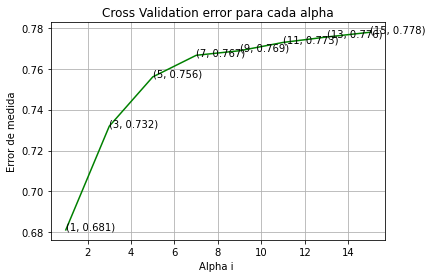

El mejor alpha para estos valores =  15 Curva ROC (AUC) para train: 0.8710812082666803
El mejor alpha para estos valores =  15 Curva ROC (AUC) Corss validation: 0.7778332551652865
El mejor alpha para estos valores =  15 Curva ROC (AUC) para test: 0.7465422797170688


In [53]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    knn_cfl=KNeighborsClassifier(n_neighbors=i)
    knn_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(knn_cfl, method='sigmoid')
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC para k = ',alpha[i],'es',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title('Cross Validation error para cada alpha')
plt.xlabel('Alpha i ')
plt.ylabel('Error de medida')
plt.show()

knn_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
knn_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(knn_cfl, method='sigmoid')
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('El mejor alpha para estos valores = ', alpha[best_alpha], 'Curva ROC (AUC) para train:',roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('El mejor alpha para estos valores = ', alpha[best_alpha], 'Curva ROC (AUC) Corss validation:',roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('El mejor alpha para estos valores = ', alpha[best_alpha], 'Curva ROC (AUC) para test:',roc_auc_score(y_test, predict_y[:,1]))

### Random forest 

AUC para cada numero de estimadores =  10 is 0.772138613516066
AUC para cada numero de estimadores =  50 is 0.7764545681498404
AUC para cada numero de estimadores =  100 is 0.7763898615278289
AUC para cada numero de estimadores =  500 is 0.7797303982531966


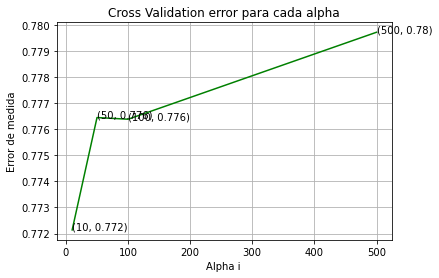

El mejor alpha para estos valores =  500 Curva ROC (AUC) para train: 0.9997863330526442
El mejor alpha para estos valores =  500 Curva ROC (AUC) Corss validation: 0.7797303982531966
El mejor alpha para estos valores =  500 Curva ROC (AUC) para test: 0.772911995515695


In [54]:
%matplotlib inline

alpha=[10,50,100,500]
cv_auc_array=[]
for i in alpha:
    rf_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    rf_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(rf_cfl, method='sigmoid')
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC para cada numero de estimadores = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title('Cross Validation error para cada alpha')
plt.xlabel('Alpha i ')
plt.ylabel('Error de medida')
plt.show()

rf_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
rf_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(rf_cfl, method='sigmoid')
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('El mejor alpha para estos valores = ', alpha[best_alpha], 'Curva ROC (AUC) para train:',roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('El mejor alpha para estos valores = ', alpha[best_alpha], 'Curva ROC (AUC) Corss validation:',roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('El mejor alpha para estos valores = ', alpha[best_alpha], 'Curva ROC (AUC) para test:',roc_auc_score(y_test, predict_y[:,1]))

### Regresion logistica
###### Veremos la relación entre una variable dicotomica y un conjunto de elementos independientes metricos o no. 

AUC para k =  4.018775720164609e-06 is 0.7267624064622182
AUC para k =  4.8225308641975306e-05 is 0.7661519889714217
AUC para k =  0.0005787037037037037 is 0.7808300666432316
AUC para k =  0.006944444444444444 is 0.7905440909086736
AUC para k =  0.08333333333333333 is 0.791256093206906
AUC para k =  1 is 0.7913469578250498
AUC para k =  12 is 0.7909610126540453
AUC para k =  144 is 0.7915761844753669
AUC para k =  1728 is 0.7916041781203507


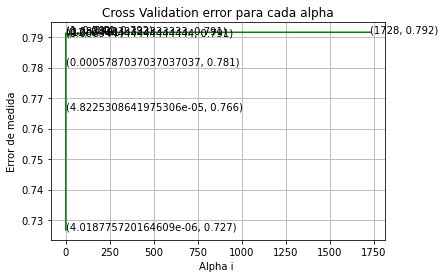

El mejor alpha para estos valores =  1728 Curva ROC (AUC) para train: 0.7914464324776271
El mejor alpha para estos valores =  1728 Curva ROC (AUC) Corss validation: 0.7916041781203507
El mejor alpha para estos valores =  1728 Curva ROC (AUC) para test: 0.7728455155729457


In [56]:
#Solver lbfgs supports only '12' or 'none' penalties
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
%matplotlib inline

alpha = [12 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    rl=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    rl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(rl, method='sigmoid')
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))
    
for i in range(len(cv_auc_array)):
    print ('AUC para k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title('Cross Validation error para cada alpha')
plt.xlabel('Alpha i ')
plt.ylabel('Error de medida')
plt.show()

rl=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
rl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(rl, method='sigmoid')
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('El mejor alpha para estos valores = ', alpha[best_alpha], 'Curva ROC (AUC) para train:',roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('El mejor alpha para estos valores = ', alpha[best_alpha], 'Curva ROC (AUC) Corss validation:',roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('El mejor alpha para estos valores = ', alpha[best_alpha], 'Curva ROC (AUC) para test:',roc_auc_score(y_test, predict_y[:,1]))